In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Restaurant_Reviews.tsv",delimiter = '\t',quoting = 3 )

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
import nltk
import re #regular expression
#nltk.download('stopwords')

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [8]:
help(re.sub)


Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [9]:
def stemming(review):
    stemmed_review = re.sub('[^a-zA-Z]',' ',review)
    stemmed_review = stemmed_review.lower()
    stemmed_review = stemmed_review.split()
    stemmed_review = [ps.stem(word) for word in stemmed_review if word not in set(stopwords.words('english'))]
    stemmed_review = ' '.join(stemmed_review)
    return stemmed_review

In [10]:
df['Review'] = df['Review'].apply(stemming)

In [11]:
df['Review']

0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                         overal impress would go back
998    whole experi underwhelm think go ninja sushi n...
999    wast enough life pour salt wound draw time too...
Name: Review, Length: 1000, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tv = TfidfVectorizer()

In [14]:
X = tv.fit_transform(df['Review']).toarray()
y = df.iloc[:,1].values

In [15]:
X.shape

(1000, 1565)

In [16]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
df[df['Liked']==1].value_counts().sum()

500

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
y_train[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1565), (200, 1565), (800,), (200,))

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train,y_train)
prediction1 = RF.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test,prediction1)*100)

Accuracy score =  73.5


In [22]:
from xgboost import XGBClassifier
xgb_c = XGBClassifier().fit(X_train, y_train)
prediction2 = xgb_c.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test,prediction2)*100)

Accuracy score =  69.0


In [23]:
from sklearn.svm import SVC
svc = SVC().fit(X_train,y_train)
prediction3 = svc.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test,prediction3)*100)

Accuracy score =  75.5


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction3)
cm

array([[83, 14],
       [35, 68]], dtype=int64)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(95.72222222222221, 0.5, 'Actual Values')

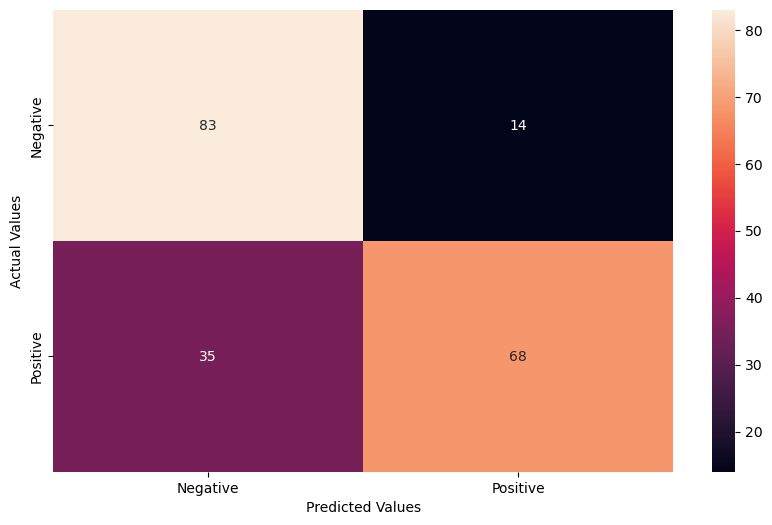

In [26]:
plt.figure(figsize = (10,6))
sns.heatmap(cm,annot = True, xticklabels = ['Negative','Positive'],yticklabels = ['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [27]:
classifier = SVC()
classifier.fit(X_train,y_train)


SVC()

In [28]:
def predict_sentiment(review):
    ps = PorterStemmer()
    stemmed_review = re.sub('[^a-zA-z]',' ',review)
    stemmed_review = stemmed_review.lower()
    stemmed_review = stemmed_review.split()
    stemmed_review = [ps.stem(word) for word in stemmed_review if word not in set(stopwords.words('english'))]
    stemmed_review = ' '.join(stemmed_review)
    final_review = tv.transform([stemmed_review]).toarray()
    return classifier.predict(final_review)

In [29]:
if predict_sentiment("good food"):
    print('Positive')
else:
    print('Negative')

Positive


In [30]:
if predict_sentiment("the food was pretty bad"):
    print('Positive')
else:
    print('Negative')

Negative
